# **Laboratorio 14: Clasificación por Regresión Logística**

Departamento de Ingeniería Biomédica

Universidad de los Andes

**IBIO-2440:** Fundamentos de Machine Learning

 **Nombres de los integrantes**


1.   Juanfelipe Lozano
2.   Angelica Ortiz
3.   María José Amorocho

**Número del grupo**

7

# **Modelo de Regresión Logística**

Modelo de clasificación binaria que predice la probabilidad de que uno o más predictores pertenezca a la clase positiva (aquella codificada como 1 en el espacio de representación) utilizando una función logística (sigmoide) aplicada a una combinación lineal de las variables de entrada:

\begin{align*}
  P(y_{i}=1|x_{i}) = \frac{1}{1 + e^{-( w^Tx_{i}+b)}} 
\end{align*}

Donde $w$ son los coeficientes del plano (o *pesos*), $b$ el intercepto (o *bias*) y $x_{i}$ la observación asociada a la etiqueta $y_{i}$, así $x,w \in \mathbb{R}^n$ y $b \in \mathbb{R}$.

El objetivo del entrenamiento es determinar los valores óptimos de los parámetros $w$ y $b$ de modo que la forma funcional de la función sigmoide se ajuste lo mejor posible a las etiquetas reales en los datos de entrenamiento, dentro del paradigma de Machine Learning Supervisado. Conforme mejor sea el ajuste, más acertadas son las probabilidades predichas y mejor se da la clasificación.

*Nota:* Es importante aclarar que el plano $w^Tx+b = 0$ se conoce como **frontera de decisión** y existe en el espacio de representación. Esta frontera ajusta los datos para calcular la probabilidad de pertenencia a la clase positiva. La decisión final (la clase a la que pertenece cada instancia del conjunto de datos) depende de si esta probabilidad predicha supera un umbral predefinido (0.5 si las clases están balanceadas en el conjunto de entrenamiento).

**1. Fundamento teórico**

Supongamos un conjunto de $m$ observaciones:

\begin{align*}
   \{(x^{(1)},y^{(1)}), (x^{(2)},y^{(2)}), ... , (x^{(m)},y^{(m)})\}.
\end{align*}

Donde cada $x^{(i)}$ corresponde a un predictor y cada $y^{(i)}$ corresponde a una de las dos clases a la que pertenece dicho predictor. Cada clase será representada con los valores 1 y 0, que se conocen respectivamente como *clase positiva* y *clase negativa*. La probabilidad de que una instancia de estas observaciones pertenezca a la clase positiva esta dada por la distribución de la función logística:

\begin{align*}
   \hat{p} = \sigma(t) = \frac{1}{1 + e^{-t^{(i)}}} 
\end{align*}

Donde $\hat{p} \in [0,1]$ corresponde a la probabilidad predicha y $t^{(i)} \in \mathbb{R}$ se conoce como *score lineal* y corresponde a un ajuste lineal de los datos:

\begin{align*}
   t^{(i)} = b + w_{i}x^{(i)}
\end{align*}

Dada la probabilidad predicha para la clase positiva, la probabilidad de la clase negativa queda directamente determinada por la relación $1 - \hat{p}$. Finalmente el modelo determina la clase a la que pertenece la instancia $x^{(i)}$ de acuerdo al siguiente umbral:

\begin{align*}
   \hat{y} = \left\{
\begin{array}{l}
  0, \text{si} \; \hat{p} < 0.5 \\
  1, \text{si} \; \hat{p} \geq 0.5
\end{array}
\right.
\end{align*}

**Nota**: Debido a su comportamiento en forma de $S$ (acotada, suave y definida para todos los reales), la función logística hace parte las llamadas funciones *sigmoides*. Este grupo de funciones tienen un amplio uso dentro de algunos modelos de Deep Learning como funciones de activación neuronal.

**2. ¿Cómo se entrena el modelo ?**

Entrenar un modelo de Regresión Logística implica determinar los valores óptimos de los parámetros $w_1, b$ que ajusten de la mejor forma las predicciones probabilísticas, $\hat{y}$, a las clases reales de los datos observados, $y$. Para ello, como ya lo estudiamos en el modelo de Regresión Lineal, es necesario definir una **función de pérdida** adecuada, cuya optimización reduzca el error entre la predicción $\hat{y}$ y el valor real $y$. Para el caso de un problema de clasificación, esta función de pérdida se conoce como **log loss** y se define como sigue:

$$
L(w,b) = - \frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)}ln(\hat{p}^{(i)}) + (1-y^{(i)})ln(1 - \hat{p}^{(i)}) \right]
$$

Siendo $m$ el número de observaciones, $\hat{p}^{(i)}$ la predicción de la probabilidad y $y^{(i)}$ la etiqueta real. Veamos cómo actua esta función de pérdida para una sola observación:

1. Supongamos que la clase verdadera, la etiqueta, es la clase positiva $y_{i}=1$ para $x_{i}$, de modo que la función de pérdida se reduce a la expresión $L= -ln( \hat{p} )$. Sin embargo, el algortimo predice una probabilidad muy baja de que $x_{i}$ pertenezca a esta clase, es decir $\hat{p} \rightarrow 0$, de modo que $L= -ln(\hat{p}) \rightarrow  \infty $ y por lo tanto la función de pérdida se hace muy grande *indicando un error en la predicción*. Si por el contrario, el algortimo predice una probabilidad muy alta de que $x_{i}$ pertenezca a esta clase, es decir $\hat{p} \rightarrow 1$, entonces $L= -ln(\hat{p}) \rightarrow  0 $ y por lo tanto la función de pérdida se hace muy pequeña o nula, *indicando una predicción precisa*.

2. Para la clase negativa se opera de forma similar. Supongamos que la clase verdadera, la etiqueta, es la clase negativa $y_{i}=0$ para $x_{i}$, de modo que la función de pérdida se reduce a la expresión $L= -ln( 1 - \hat{p} )$. Sin embargo, el algortimo predice una probabilidad muy baja de que $x_{i}$ pertenezca a esta clase, es decir $1 - \hat{p} \rightarrow 0$, de modo que $L= -ln(1 - \hat{p}) \rightarrow  \infty $ y por lo tanto la función de pérdida se hace muy grande . Si por el contrario, el algortimo predice una probabilidad muy alta de que $x_{i}$ pertenezca a esta clase, es decir $1 - \hat{p} \rightarrow 1$, entonces $L= -ln(1 - \hat{p}) \rightarrow  0 $ y por lo tanto la función de pérdida se hace muy pequeña o nula.

Así, *la función de pérdida aumenta o disminuye según la precisión en la predicción de la probabilidad y se ajusta al comportamiento que esperamos dentro del paradigma del ML Supervisado*. Ahora, ya que entendemos el funcionamiento de la función de pérdida, basta encontrar los parámetros óptimos $w,b$ que mejor ajustan los datos. Para ello basta con minimizar la función de pérdida respecto a estos parámetros:

$$
  \min_{w,b\in\mathbb{R}} L(w,b).
$$

La función de pérdida *log loss* es convexa así que pueden usarse algoritmos de optimización numérica para hallar el minimizador y podemos garantizar que, bajo las condiciones adecuadas de convergencia, este minimizador corresponde al mínimo global. Uno de los algoritmos más utilizados para resolver este problema es el **Método de Newton**, que estudiamos en laboratorios anteriores. Una vez se conocen los valores óptimos de $w$ y $b$, el modelo de Regresión Logística entrenado puede usarse para predecir la clase a la que pertenecen datos no vistos. 

# **Contexto del problema**

Uno de los tipos de cáncer más común entre la población femenina es el cáncer de seno. Éste ocurre cuando las células normales mutan y se transforman en células cancerígenas. Esta transformación puede ser evaluada a través de procedimientos en los que se extraen muestras de tejido y se observan bajo el microscopio. Se ha mostrado que en etapas tempranas el núcleo de las células provenientes de los tumores cambia su morfología, permitiendo predecir el desarrollo del cáncer (Narasimha et al., 2013).

En este laboratorio vamos a entrenar un modelo de Regresión Logística para determinar si las células provenientes de un tumor están en proceso de mutación carcinogénica o no, es decir, implementaremos un modelo de clasificación, una tarea que hace parte del paradigma de Aprendizaje Supervisado en Machine Learning.

Para entrenar el modelo usaremos una base de datos que consta de 469 muestras obtenidas de dos tipos de pacientes: mujeres que desarrollaron cáncer de seno y aquellas que no. Clasificaremos dicha aparición a partir de dos características que se extraen de las imágenes: el **radio promedio** y el **índice de suavidad** (_smoothness index_) de los núcleos de las células. Esta última medida hace referencia a un índice de variación local del radio en un mismo núcleo: conforme más pequeño sea el índice de suavidad, más redondo será el núcleo. Estas medidas se toman a partir de una imagen del tejido, como se muestra en la Figura 1.

<center> Figura 1. Muestras de núcleos celulares de biopsias de tumores de seno, los núcleos pequeños y redondos proceden de muestras no-cancerígenas (Narasimha et al., 2013). </center>

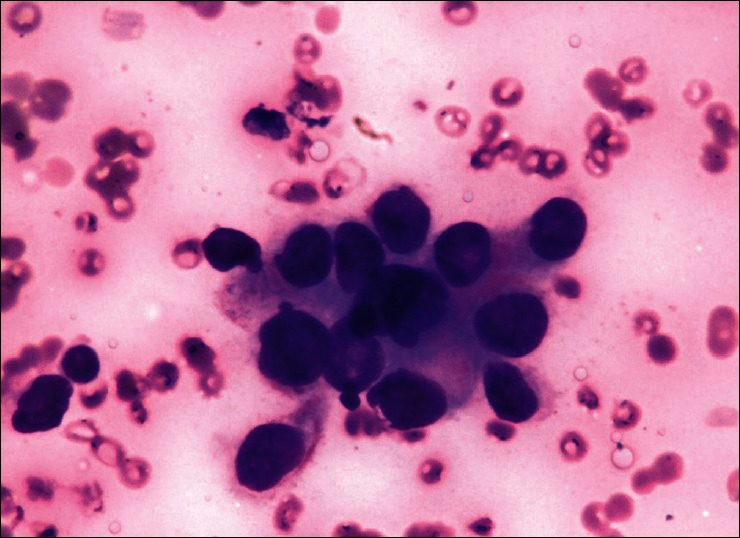

> Narasimha, A., Vasavi, B., & Kumar, H. M. (2013). Significance of nuclear morphometry in benign and malignant breast aspirates. _International Journal of Applied and Basic Medical Research_, 3(1), 22.


# **Ejercicios**

1. Importe los datos del archivo *Breast_Cancer_Train.csv*. Este archivo se compone de tres columnas: las dos primeras corresponden a los valores del radio promedio y del índice de suavidad medidos en las muestras y la tercera columna, de encabezado _"Pronostic"_, corresponde al pronóstico de estas:

- $1$ si la muestra proviene de un tumor maligno.
- $0$ si la muestra proviene de un tumor benigno.

Haga un gráfico de dispersión entre el radio promedio y el índice de suavidad agregando el pronóstico como barra de color. Analice la gráfica resultante.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [8]:
df_cancer_train = pd.read_csv('Breast_Cancer_Train.csv')
df_cancer_train.head()

,pronostic,radius_mean,smoothness_mean
0,1,16.02,0.08206
1,0,12.32,0.10280
2,0,12.85,0.07551
3,1,14.90,0.09947
4,1,18.61,0.09440


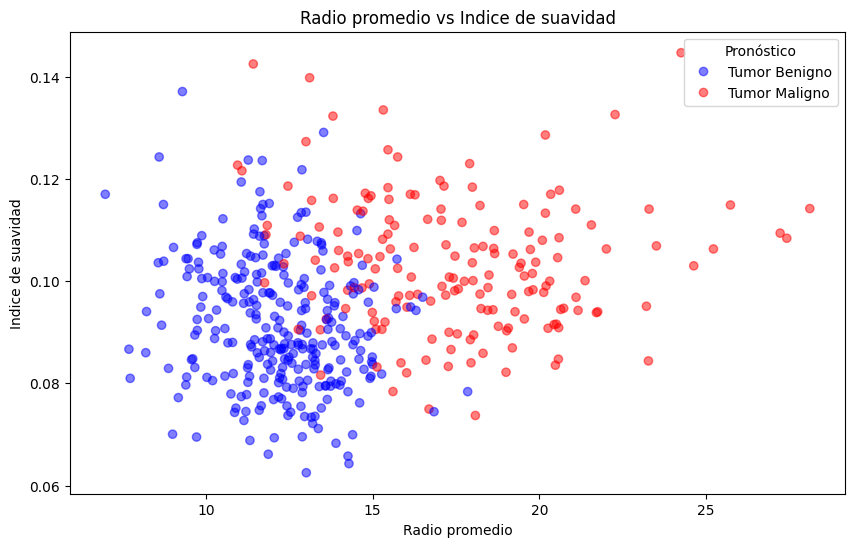

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(df_cancer_train['radius_mean'], df_cancer_train['smoothness_mean'], c=df_cancer_train['pronostic'], cmap='bwr', alpha=0.5)
handles, labels = scatter.legend_elements()
new_labels = ['Tumor Benigno', 'Tumor Maligno']
ax.legend(handles, new_labels, title="Pronóstico")

ax.set_xlabel('Radio promedio')
ax.set_ylabel('Indice de suavidad')
ax.set_title('Radio promedio vs Indice de suavidad')
plt.show()

De la gráfica obtenida, se ve que los tumores malignos (rojos) tienden a tener un mayor radio y un índice de suavidad ligeramente mayor a los tumores benignos (azules), que por su lado parecen estar menos dispersos y tener valores de radio promedio más bajos. 

2. Note que los valores de la característica *smoothness* se encuentran en el intervalo $[0.06215, 0.1447]$, mientras que los valores de la característica *radius* yacen en el intervalo  $[7.691, 28.11]$. Esta diferencia de escala entre los dos predictores afecta directamente la estimación de los parámetros $w$ y $b$ que definen la frontera de decisión  obligando al ajuste a dar prioridad a una característica sobre la otra. Una forma de atender esta dificultad consiste en estandarizar los datos de modo que se anule la diferencia de escala. Para ello podemos usar la función `StandardScaler` de la librería `sklearn` de la siguiente forma:

```
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
```
Donde `X` es la matriz que condensa las observaciones dentro del modelo lineal que ajusta la frontera de decisión:

\begin{align*}
  X =
  \begin{bmatrix}
    x_1^{(1)} & x_2^{(1)} & ⋯ & x_n^{(1)} \\
    x_1^{(2)} & x_2^{(2)} & ⋯ & x_n^{(2)} \\
    \vdots & \vdots & \ddots & \vdots\\
    x_1^{(m)} & x_2^{(m)} & ⋯ & x_n^{(m)}
  \end{bmatrix}
\end{align*}

Donde $x_i^{(j)}$ es la observación $j$ para la característica $i$. De modo que, 

$$
X \theta + b = 0
$$

Con $\theta = [w_1 w_2 ... w_n]^T$

Implemente una función que reciba los arreglos de las observaciones y retorne el arreglo con los datos estandarizados. Luego repita el gráfico del punto anterior pero considerando ahora los datos estandarizados.

In [ ]:
def estandarizar_datos(array):
    """Recibe los arreglos de las observaciones y retorna el arreglo con 
    los datos estandarizados..

    Args:
        array: arreglo a estandarizar.
    """
    scaler = StandardScaler()
    array_estandarizado = scaler.fit_transform(array)
    return array_estandarizado

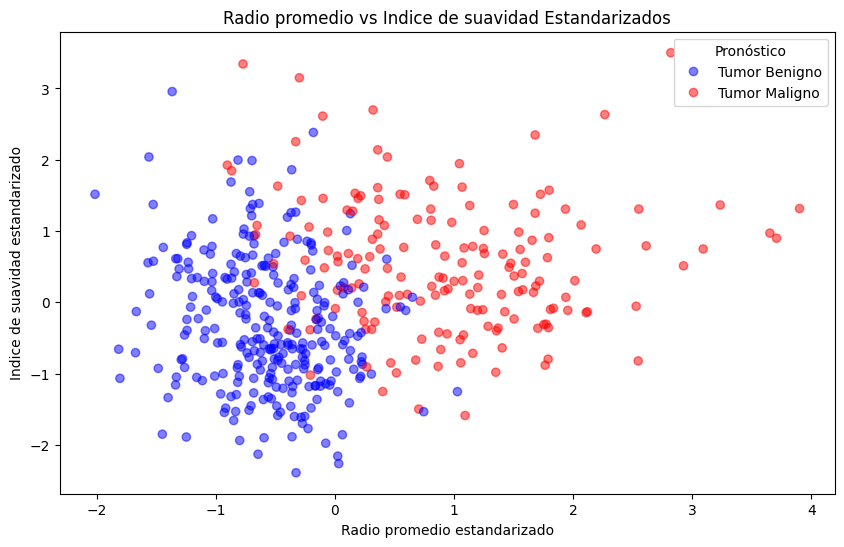

In [11]:
radius_mean_estand = estandarizar_datos(df_cancer_train[['radius_mean']]) 
smoothness_mean_estand = estandarizar_datos(df_cancer_train[['smoothness_mean']]) 
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(radius_mean_estand, smoothness_mean_estand, c=df_cancer_train['pronostic'], cmap='bwr', alpha=0.5)

handles, labels = scatter.legend_elements()
new_labels = ['Tumor Benigno', 'Tumor Maligno']
ax.legend(handles, new_labels, title="Pronóstico")

ax.set_xlabel('Radio promedio estandarizado')
ax.set_ylabel('Indice de suavidad estandarizado')  
ax.set_title('Radio promedio vs Indice de suavidad Estandarizados')
plt.show()

3. Para entrenar un modelo de Clasificación por Regresión Logística podemos utilizar el método `.fit()`  del objeto `LogisticRegression()` de la librería `sklearn.linear_model` de la siguiente forma:

```
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_scaled, y)
```

Donde `y` es el vector de etiquetas,

\begin{align*}
  y = \left[ y^{(1)}, y^{(2)}, ..., y^{(m)}\right]^T
\end{align*}

Una vez entrenado el modelo se pueden obtener los parámetros óptimos $w$ y $b$ estimados utilizando los atributos `.coef_` e `.intercept_` del objeto `model()`:

```
w = model.coef_.flatten()
b = model.intercept_

```
Implemente una función que tome por argumentos los datos estandarizados y el arreglo con las etiquetas, y retorne un diccionario con el modelo entrenado y los parámetros $w$ y $b$.

In [12]:
def train_model(X, y):
    
    model = LogisticRegression()
    model.fit(X, y)
    w = model.coef_.flatten()
    b = model.intercept_
    rta = {'w': w, 'b': b, 'model': model}
    return rta

4. Grafique nuevamente la dispersión de los datos estandarizados pero incluya ahora la frontera de decisión que definen los parámetros óptimos $w$ y $b$.

5. Para evaluar el rendimiento del modelo utilizamos una métrica (score) sobre datos no vistos durante el proceso de entrenamiento. De acuerdo al valor de la métrica, podemos establecer la generalidad y robustez del modelo. Una métrica usual en la tarea de clasificación consiste en calcular el porcentaje de datos correctamente clasificados con respecto al total de datos.

Implemente una función que utilice el modelo que ya entrenó y uselo para evaluar su rendimiento en los datos de prueba tomados del archivo *Breast_Cancer_Test.csv* (la función debe tomar por argumentos este modelo, la matriz H con los nuevos datos y las etiquetas de los nuevos datos). Finalmente retorne el porcentaje de datos bien clasificados con respecto al total de datos. Recuerde que el modelo se entrenó utilizando los datos estandarizados, por lo cual es necesario utilizar el estandarizador ajustado en los datos de entrenamiento para escalar los datos de prueba. **Hint**: Consulte en la documentación de Scikit-Learn cómo se utiliza el método `predict()` del objeto `LogisticRegression()`. 

6. En general, la frontera de decisión no tiene un comportamiento lineal tan marcado como el que observamos en los datos anteriores, sino que sigue comportamientos más complejos. Para analizar esto, importe los datos del archivo *classification_train.txt* en donde las dos primeras columnas $(X,Y)$ corresponden a las observaciones y la tercera columna ($Z$) a las etiquetas. Luego, haga un gráfico de dispersión entre $X$ y $Y$ agregando la etiqueta $Z$ como barra de color.

7. Utilice las funciones que implementó anteriormente para estandarizar y entrenar el modelo de clasificación con estos nuevos datos. Luego, grafique nuevamente la dispersión de estos datos estandarizados pero incluya ahora la frontera de decisión que definen los parámetros óptimos $w$ y $b$.

8. Utilice ahora la función que calcula la métrica que implementó anteriormente para evaluar el rendimiento de los datos nuevos, en el conjunto de prueba importando los datos del archivo *classification_test.txt*.

9. Responda las siguientes preguntas:

- Compare el gráfico de observaciones antes y después de estandarizar los datos, ¿cómo se estandarizan los datos?. **Hint**: Revise la documentación de la función utilizada para estandarizar.
- Tomando como referencia el gráfico de dispersión que incluye la frontera de decisión para los datos de cancer de seno, ¿por dónde se trazó ésta recta, podemos decir que minimiza las distancias entre los puntos?
- Tomando como referencia el gráfico de dispersión que incluye la frontera de decisión para los datos nuevos, ¿considera que el modelo lineal para la frontera de decisión funciona en estos datos?, ¿qué relación matemática podría funcionar mejor en este caso?
- Fíjese que una forma *a priori* de evaluar el rendimiento del modelo de Clasificación puede ser la evaluación de la frontera de decisión: conforme mejor se separen las dos clases en este espacio de características mejor será la predicción del modelo. Teniendo en cuenta el comportamiento de la frontera de decisión en los datos sobre el cáncer de seno y el comportamiento que propone para los datos nuevos en la respuesta anterior, ¿cómo podríamos determinar desde este punto de vista gráfico si un dato está bien o mal clasificado?
